# Import libraries

In [34]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

# Hyperparameters


In [41]:
epochs = 10
batch_size = 16
margin = 1

# Load data

In [87]:
#import lib
import os
import numpy as np
import copy
import cv2
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import random

# Load Dataset
def loadimgs(path,n = 0):
    '''
    path => Path of train directory or test directory
    '''
    X=[]
    y = []
    cat_dict = {}
    lang_dict = {}
    curr_y = n
    
    # we load every alphabet seperately so we can isolate them later
    for alphabet in os.listdir(path):
        print("loading alphabet: " + alphabet)
        lang_dict[alphabet] = [curr_y,None]
        alphabet_path = os.path.join(path,alphabet)
        
        # every letter/category has it's own column in the array, so  load seperately
        for letter in os.listdir(alphabet_path):
            cat_dict[curr_y] = (alphabet, letter)
            category_images=[]
            letter_path = os.path.join(alphabet_path, letter)
            
            # read all the images in the current category
            for filename in os.listdir(letter_path):
                image_path = os.path.join(letter_path, filename)
                image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
                category_images.append(image)
                y.append(curr_y)
            try:
                X.append(np.stack(category_images))
            # edge case  - last one
            except ValueError as e:
                print(e)
                print("error - category_images:", category_images)
            curr_y += 1
            lang_dict[alphabet][1] = curr_y - 1
    y = np.vstack(y)
    X = np.stack(X)
    return X,y,lang_dict

In [88]:
X,y,c = loadimgs('train/',n=0);

loading alphabet: Alphabet_of_the_Magi
loading alphabet: Anglo-Saxon_Futhorc
loading alphabet: Arcadian
loading alphabet: Armenian
loading alphabet: Asomtavruli_(Georgian)
loading alphabet: Balinese
loading alphabet: Bengali
loading alphabet: Blackfoot_(Canadian_Aboriginal_Syllabics)
loading alphabet: Braille
loading alphabet: Burmese_(Myanmar)
loading alphabet: Cyrillic
loading alphabet: Early_Aramaic
loading alphabet: Futurama
loading alphabet: Grantha
loading alphabet: Greek
loading alphabet: Gujarati
loading alphabet: Hebrew
loading alphabet: Inuktitut_(Canadian_Aboriginal_Syllabics)
loading alphabet: Japanese_(hiragana)
loading alphabet: Japanese_(katakana)
loading alphabet: Korean
loading alphabet: Latin
loading alphabet: Malay_(Jawi_-_Arabic)
loading alphabet: Mkhedruli_(Georgian)
loading alphabet: N_Ko
loading alphabet: Ojibwe_(Canadian_Aboriginal_Syllabics)
loading alphabet: Sanskrit
loading alphabet: Syriac_(Estrangelo)
loading alphabet: Tagalog
loading alphabet: Tifinagh


In [89]:
X = X.astype('float32')
y = y.astype('float32')

# Pair image

In [90]:
def make_pairs(data,label,ite):   # x is data; y is label
    
    num_class = np.size(data,axis=0);
    
    pairs = []
    labels = []
    
    for i in range(ite):
        for idx1 in range(np.size(data,axis=0)):
            # same match
            x1 = data[idx1,i]
            label1 = label[idx1*np.size(data,axis=1)]
            x2 = data[idx1,random.choice(np.arange(20))]
            
            pairs +=[[x1,x2]]
            labels +=[1]
            
            # different match
            label2 = random.choice(np.arange(np.size(data,axis=0)))
            while label2 == label1:
                label2 = random.choice(np.arange(np.size(data,axis=0)))
                
            x2 = data[label2,random.choice(np.arange(20))]
            
            pairs += [[x1,x2]]
            labels += [0]
            
    return np.array(pairs), np.array(labels).astype('float32')

label = 1.0
label = 0.0
label = 1.0
label = 0.0
label = 1.0
label = 0.0
label = 1.0
label = 0.0
label = 1.0
label = 0.0


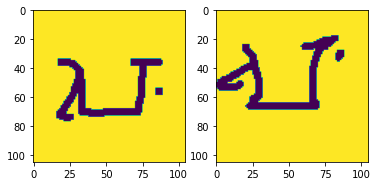

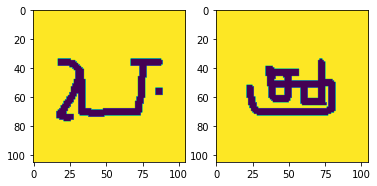

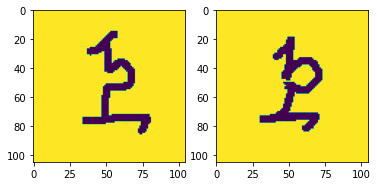

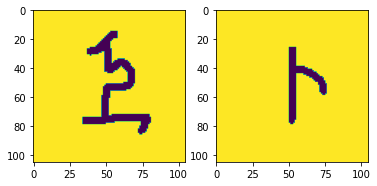

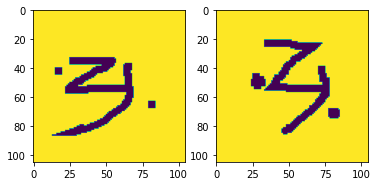

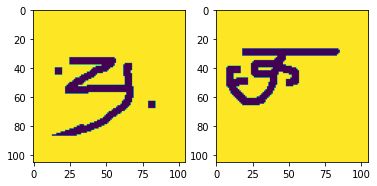

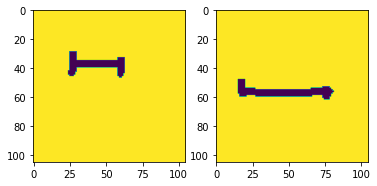

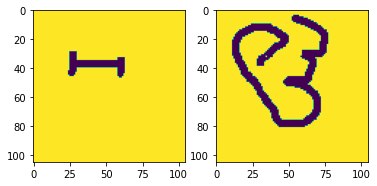

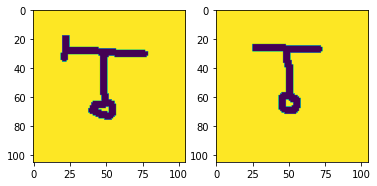

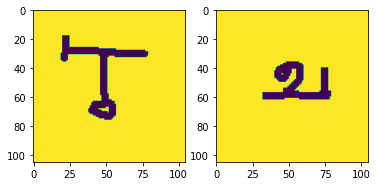

In [91]:
pairs, labels = make_pairs(X,y,1)

# show some images
for i in range(10):
    plt.figure()
    plt.subplot(121)
    plt.imshow(pairs[i,0])
    plt.subplot(122)
    plt.imshow(pairs[i,1])
    print('label =',labels[i])

In [92]:
pairs.shape, labels.shape

((1928, 2, 105, 105), (1928,))

In [93]:
pairs_train, pairs_test, labels_train, labels_test = train_test_split(pairs,
                                                    labels,
                                                    test_size=0.1,
                                                    shuffle=True,
                                                    random_state=42)

In [94]:
x_train_1 = pairs_train[:,0]
x_train_2 = pairs_train[:,1]

x_test_1 = pairs_test[:, 0]  
x_test_2 = pairs_test[:, 1]

x_train_1.shape, x_test_1.shape

((1735, 105, 105), (193, 105, 105))

In [95]:
def visualize(pairs, labels, to_show=6, num_col=3, predictions=None, test=False):
    """Creates a plot of pairs and labels, and prediction if it's test dataset.

    Arguments:
        pairs: Numpy Array, of pairs to visualize, having shape
               (Number of pairs, 2, 28, 28).
        to_show: Int, number of examples to visualize (default is 6)
                `to_show` must be an integral multiple of `num_col`.
                 Otherwise it will be trimmed if it is greater than num_col,
                 and incremented if if it is less then num_col.
        num_col: Int, number of images in one row - (default is 3)
                 For test and train respectively, it should not exceed 3 and 7.
        predictions: Numpy Array of predictions with shape (to_show, 1) -
                     (default is None)
                     Must be passed when test=True.
        test: Boolean telling whether the dataset being visualized is
              train dataset or test dataset - (default False).

    Returns:
        None.
    """
    num_row = to_show//num_col if to_show//num_col !=0 else 1 # // divided and obtain upper integer
    
    to_show = num_row * num_col
    
    #plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(5, 5))
    for i in range(to_show):

        # If the number of rows is 1, the axes array is one-dimensional
        if num_row == 1:
            ax = axes[i % num_col]
        else:
            ax = axes[i // num_col, i % num_col]

        ax.imshow(tf.concat([pairs[i][0], pairs[i][1]], axis=1), cmap="gray")
        ax.set_axis_off()
        if test:
            ax.set_title("True: {} | Pred: {:.5f}".format(labels[i], predictions[i][0]))
        else:
            ax.set_title("Label: {}".format(labels[i]))
    if test:
        plt.tight_layout(rect=(0, 0, 1.9, 1.9), w_pad=0.0)
    else:
        plt.tight_layout(rect=(0, 0, 1.5, 1.5))
    plt.show()
        

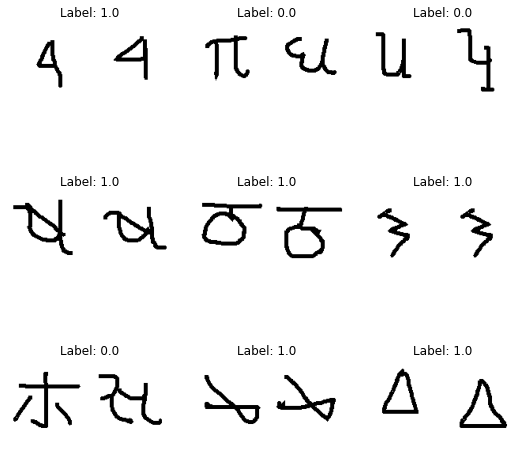

In [96]:
visualize(pairs_train[:10], labels_train[:10], to_show=10, num_col=3)

# Euclidean distance

In [97]:
# Provided two tensors t1 and t2
# Euclidean distance = sqrt(sum(square(t1-t2)))
def euclidean_distance(vects):
    """Find the Euclidean distance between two vectors.

    Arguments:
        vects: List containing two tensors of same length.

    Returns:
        Tensor containing euclidean distance
        (as floating point value) between vectors.
    """

    x, y = vects
    sum_square = tf.math.reduce_sum(tf.math.square(x - y), axis=1, keepdims=True)
    return tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))

In [98]:
input = layers.Input((105,105,1))
x = tf.keras.layers.BatchNormalization()(input)
x = layers.Conv2D(64,(10,10),activation='relu',
                  kernel_initializer='he_normal',
                  kernel_regularizer=regularizers.L2(2e-4))(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(128,(7,7),activation='relu',
                              kernel_initializer='he_normal',
                              bias_initializer='zeros',
                              kernel_regularizer=regularizers.L2(2e-4)
                             )(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(128,(4,4),activation='relu',
                              kernel_initializer='he_normal',
                              bias_initializer='zeros',
                              kernel_regularizer=regularizers.L2(2e-4)
                             )(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(256,(4,4),activation='relu',
                              kernel_initializer='he_normal',
                              bias_initializer='zeros',
                              kernel_regularizer=regularizers.L2(2e-4)
                             )(x)
x = layers.Flatten()(x)
x = layers.Dense(4096,activation='sigmoid',
               kernel_regularizer=regularizers.L2(1e-3),
               kernel_initializer='he_normal',
               bias_initializer='zeros')(x)

embedding_network = keras.Model(input,x)

input_1 = layers.Input((105,105,1))
input_2 = layers.Input((105,105,1))

tower_1 = embedding_network(input_1)
tower_2 = embedding_network(input_2)

merge_layer = layers.Lambda(euclidean_distance)([tower_1,tower_2])
normal_layer = tf.keras.layers.BatchNormalization()(merge_layer)
output_layer = layers.Dense(1,activation='sigmoid')(normal_layer)
siamese = keras.Model(inputs=[input_1, input_2], outputs = output_layer)

# contrastive loss

In [99]:
def loss(margin=1):
    """Provides 'constrastive_loss' an enclosing scope with variable 'margin'.

    Arguments:
        margin: Integer, defines the baseline for distance for which pairs
                should be classified as dissimilar. - (default is 1).

    Returns:
        'constrastive_loss' function with data ('margin') attached.
    """

    # Contrastive loss = mean( (1-true_value) * square(prediction) +
    #                         true_value * square( max(margin-prediction, 0) ))
    def contrastive_loss(y_true, y_pred):
        """Calculates the constrastive loss.

        Arguments:
            y_true: List of labels, each label is of type float32.
            y_pred: List of predictions of same length as of y_true,
                    each label is of type float32.

        Returns:
            A tensor containing constrastive loss as floating point value.
        """

        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - (y_pred), 0))
        return tf.math.reduce_mean(
            (1 - y_true) * square_pred + (y_true) * margin_square
        )

    return contrastive_loss

# Compile the model with the contrastive loss

In [100]:
siamese.compile(loss=loss(margin=margin), optimizer="RMSprop", metrics=["accuracy"])
siamese.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 105, 105, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_16 (InputLayer)          [(None, 105, 105, 1  0           []                               
                                )]                                                                
                                                                                                  
 model_7 (Functional)           (None, 4096)         38947652    ['input_15[0][0]',               
                                                                  'input_16[0][0]']         

# Train the model

In [102]:
history = siamese.fit(
    [x_train_1[:10], x_train_2[:10]],
    labels_train[:10],
    batch_size=batch_size,
    epochs=epochs,
)

Epoch 1/10
1/1 [==============================] - 1s 666ms/step - loss: 3.4361 - accuracy: 0.6000
Epoch 2/10
1/1 [==============================] - 1s 687ms/step - loss: 3.2143 - accuracy: 0.7000
Epoch 3/10
1/1 [==============================] - 1s 706ms/step - loss: 3.0254 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 1s 701ms/step - loss: 2.8883 - accuracy: 0.7000
Epoch 5/10
1/1 [==============================] - 1s 722ms/step - loss: 2.7295 - accuracy: 0.6000
Epoch 6/10
1/1 [==============================] - 1s 713ms/step - loss: 2.5678 - accuracy: 0.7000
Epoch 7/10
1/1 [==============================] - 1s 724ms/step - loss: 2.4751 - accuracy: 0.7000
Epoch 8/10
1/1 [==============================] - 1s 730ms/step - loss: 2.4237 - accuracy: 0.4000
Epoch 9/10
1/1 [==============================] - 1s 728ms/step - loss: 2.3248 - accuracy: 0.5000
Epoch 10/10
1/1 [==============================] - 1s 726ms/step - loss: 2.1514 - accuracy: 0.6000


In [104]:
results = siamese.evaluate([x_test_1[:10], x_test_2[:10]], labels_test[:10])
print("test loss, test acc:", results)

1/1 [==============================] - 0s 266ms/step - loss: 2.0859 - accuracy: 0.4000
test loss, test acc: [2.085850715637207, 0.4000000059604645]


7/7 [==============================] - 1s 194ms/step


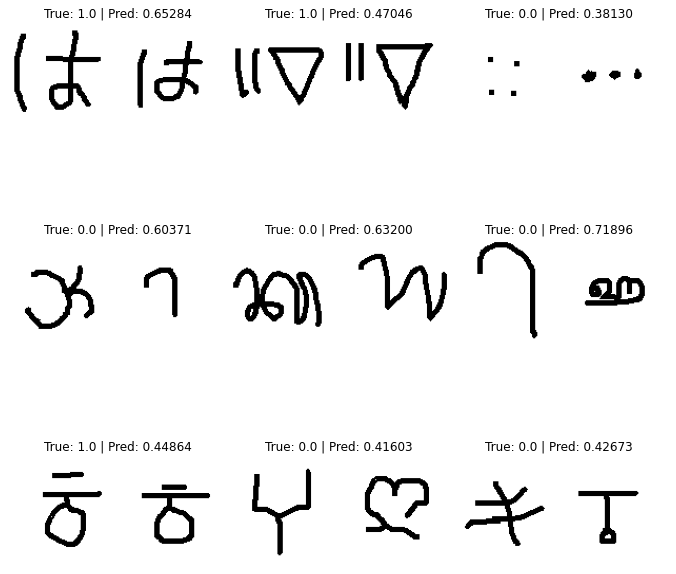

In [106]:
predictions = siamese.predict([x_test_1, x_test_2])
visualize(pairs_test, labels_test, to_show=10,num_col=3, predictions=predictions, test=True)

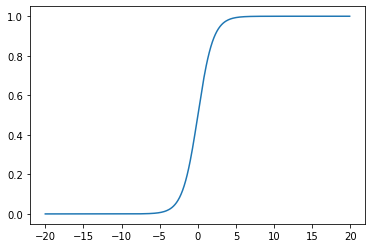

In [118]:
a = tf.constant(np.arange(-20,20,0.1).tolist(), dtype = tf.float32)
b = tf.keras.activations.sigmoid(a)
b.numpy()

plt.plot(a,b)